In [1]:
# CLONAR Y PREPARAR TODO
!rm -rf latent-mutual-information
!git clone https://github.com/ggdna/latent-mutual-information.git
%cd /content/latent-mutual-information/lmi

# Renombrar archivo
!mv lmi.py lmi_core.py

# Reparar imports relativos y errores de numpy en todos los archivos relevantes
!sed -i 's/from \. import /import /g' *.py
!sed -i 's/np\.NaN/np.nan/g' *.py

# Añadir ruta al sistema
import sys
sys.path.append('/content/latent-mutual-information/lmi')

# IMPORTAR MÓDULOS
import lmi_core as lmi
import models
import ksg

# DATASET Y EJECUCIÓN
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data

X1 = X[:, :15]
X2 = X[:, 15:]

estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    regularizer='models.AECross',
                                    alpha=1, lam=1,
                                    N_dims=8, epochs=50, quiet=False)

estimate

Cloning into 'latent-mutual-information'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 243 (delta 104), reused 178 (delta 42), pack-reused 0 (from 0)
Receiving objects: 100% (243/243), 21.93 MiB | 6.34 MiB/s, done.
Resolving deltas: 100% (104/104), done.
/content/latent-mutual-information/lmi


  0%|          | 0/50 [00:00<?, ?Epoch/s]

array([ 4.58309439,         nan,  4.22242063,         nan,         nan,
        3.49815858,  2.93138553,         nan,         nan,  3.62931267,
        1.30505619,         nan,         nan,         nan,  4.84930598,
        4.11421851,         nan,         nan,         nan,  0.91952534,
        1.05331536,  2.37991153,  5.45042891,         nan,  1.00035892,
               nan,  3.18123429,  4.07986862,         nan,         nan,
               nan,  3.66767004,         nan,  2.73711052,  2.6400721 ,
               nan,         nan,  1.80515994, -0.79291985,  2.18566021,
        2.25745084, -0.26358237,  1.46520525,  2.84212788,  2.69785837,
               nan,         nan,         nan,         nan,  1.06780233,
               nan,         nan,         nan,  1.06854255,  2.37672301,
               nan,         nan,  3.69343245,         nan,         nan,
        1.02021479,  3.08614284,         nan,  1.80515994,  3.30699628,
        2.2324535 ,         nan,         nan,         nan,  2.19

In [ ]:
estimate

In [ ]:
X.shape

In [ ]:
# INSTALAR DEPENDENCIAS
!pip install umap-learn matplotlib --quiet

# IMPORTAR MÓDULOS
import lmi_core as lmi
import models
import ksg

import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# CARGAR Y NORMALIZAR DATOS
data = load_breast_cancer()
X = data.data
y = data.target  # clases: 0 = maligno, 1 = benigno
X = StandardScaler().fit_transform(X)

# SEPARAR EN DOS VISTAS
X1 = X[:, :15]
X2 = X[:, 15:]

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    #regularizer='models.AECross',
                                    #alpha=1, lam=1,
                                    N_dims=8, epochs=500, quiet=False)

# PROYECTAR X CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# VISUALIZACIÓN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MI ESTIMADA
sc1 = axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP colored by Estimated MI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

# CLASES VERDADERAS
sc2 = axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP colored by True Labels")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Class (0 = Malignant, 1 = Benign)")

plt.tight_layout()
plt.show()


Z_concat = np.concatenate([Zx, Zy], axis=1)
# PROYECTAR Zx CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
Zx_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ESTIMATE
sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP of Zx colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

# ETIQUETAS REALES
sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP of Zx colored by Class")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Class (0=Malignant, 1=Benign)")

plt.tight_layout()
plt.show()


In [3]:
!pip install  scanpy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
import scanpy as sc
adata = sc.datasets.moignard15()
adata

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
AnnData object with n_obs × n_vars = 3934 × 42
    obs: 'exp_groups'
    uns: 'iroot', 'exp_groups_colors


    # IMPORTAR MÓDULOS
import lmi_core as lmi
import models
import ksg

import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# CARGAR Y NORMALIZAR DATOS
data = load_breast_cancer()
X = data.data
y = data.target  # clases: 0 = maligno, 1 = benigno
X = StandardScaler().fit_transform(X)

# SEPARAR EN DOS VISTAS
X1 = X[:, :15]
X2 = X[:, 15:]

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    #regularizer='models.AECross',
                                    #alpha=1, lam=1,
                                    N_dims=8, epochs=500, quiet=False)

# PROYECTAR X CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# VISUALIZACIÓN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MI ESTIMADA
sc1 = axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP colored by Estimated MI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

# CLASES VERDADERAS
sc2 = axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP colored by True Labels")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Class (0 = Malignant, 1 = Benign)")

plt.tight_layout()
plt.show()


Z_concat = np.concatenate([Zx, Zy], axis=1)
# PROYECTAR Zx CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
Zx_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ESTIMATE
sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP of Zx colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

# ETIQUETAS REALES
sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP of Zx colored by Class")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Class (0=Malignant, 1=Benign)")

plt.tight_layout()
plt.show()


In [ ]:
adata.X.shape

In [ ]:
# INSTALAR DEPENDENCIAS

# IMPORTAR MÓDULOS
import lmi_core as lmi
import models
import ksg

import numpy as np
import matplotlib.pyplot as plt
import umap
import scanpy as sc
from sklearn.preprocessing import StandardScaler

# CARGAR DATOS DE PÁNCREAS
# IMPORTAR MÓDULOS
import scanpy as sc
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# CARGAR DATOS DE PÁNCREAS
adata = sc.read("pancreas.h5ad")  # Asegúrate de tener el archivo 'pancreas.h5ad' en tu directorio de trabajo
X = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X
y = adata.obs["celltype"].astype("category").cat.codes.values  # clases como números

# NORMALIZAR
X = StandardScaler().fit_transform(X)

# SEPARAR EN DOS VISTAS
X1 = X[:, :X.shape[1] // 2]
X2 = X[:, X.shape[1] // 2:]

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    regularizer='models.AECross',
                                    alpha=1, lam=1,
                                    N_dims=8, epochs=300, quiet=False)

# PROYECTAR X CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# VISUALIZACIÓN UMAP DE LOS DATOS ORIGINALES
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MI ESTIMADA
sc1 = axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP colored by Estimated MI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

# ETIQUETAS CELULARES REALES
sc2 = axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=20)
axs[1].set_title("UMAP colored by Cell Type")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Cell Type ID")

plt.tight_layout()
plt.show()

# PROYECTAR EMBEDDINGS CONCATENADOS CON UMAP
Z_concat = np.concatenate([Zx, Zy], axis=1)
Z_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(Z_concat)

# VISUALIZACIÓN DEL EMBEDDING LATENTE
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(Z_umap[:, 0], Z_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("Latent UMAP colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

sc2 = axs[1].scatter(Z_umap[:, 0], Z_umap[:, 1], c=y, cmap='tab20', s=20)
axs[1].set_title("Latent UMAP colored by Cell Type")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Cell Type ID")

plt.tight_layout()
plt.show()


In [ ]:
adata = sc.datasets.ebi_expression_atlas("E-MTAB-5061")
adata

In [ ]:
adata.X

In [ ]:
Zx.shape

In [ ]:
Z_concat = np.concatenate([Zx, Zy], axis=1)
# PROYECTAR Zx CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
Zx_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ESTIMATE
sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP of Zx colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

# ETIQUETAS REALES
sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP of Zx colored by Class")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Class (0=Malignant, 1=Benign)")

plt.tight_layout()
plt.show()

In [ ]:
# ============================
# 1. IMPORTAR MÓDULOS
# ============================
import lmi_core as lmi
import models
import ksg

import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# ============================
# 2. CARGAR Y NORMALIZAR DATOS
# ============================
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = Maligno, 1 = Benigno

X = StandardScaler().fit_transform(X)

# ============================
# 3. DIVIDIR EN DOS VISTAS
# ============================
X1 = X[:, :15]
X2 = X[:, 15:]

# ============================
# 4. CALCULAR LMI
# ============================
estimate, (Zx, Zy), model = lmi.lmi(
    X1, X2,
    #regularizer='models.AECross',
    #alpha=1, lam=1,
    N_dims=5#, epochs=500, quiet=False
)

# ============================
# 5. PROYECCIÓN UMAP DE X ORIGINAL
# ============================
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# ============================
# 6. VISUALIZAR X ORIGINAL
# ============================
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP de X coloreado por LMI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

sc2 = axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP de X coloreado por clase")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Clase (0 = Maligno, 1 = Benigno)")

plt.tight_layout()
plt.show()

# ============================
# 7. PROYECCIÓN UMAP DE [Zx + Zy]
# ============================
Z_concat = np.concatenate([Zx, Zy], axis=1)
Z_umap = reducer.fit_transform(Z_concat)

# ============================
# 8. VISUALIZAR REPRESENTACIONES LATENTES
# ============================
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(Z_umap[:, 0], Z_umap[:, 1], c=estimate, cmap='viridis', s=20)
axs[0].set_title("UMAP de [Zx + Zy] coloreado por LMI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

sc2 = axs[1].scatter(Z_umap[:, 0], Z_umap[:, 1], c=y, cmap='coolwarm', s=20)
axs[1].set_title("UMAP de [Zx + Zy] coloreado por clase")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Clase (0 = Maligno, 1 = Benigno)")

plt.tight_layout()
plt.show()


In [ ]:
# INSTALAR DEPENDENCIAS
!pip install scanpy umap-learn matplotlib --quiet

# IMPORTAR MÓDULOS
import scanpy as sc
import lmi_core as lmi
import models
import ksg

import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

# CARGAR DATOS DE DIFERENCIACIÓN CELULAR
adata = sc.datasets.moignard15()
X = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X
y = adata.obs["exp_groups"].astype("category").cat.codes.values  # codificar clases como enteros
X = StandardScaler().fit_transform(X)

# SEPARAR EN DOS VISTAS
X1 = X[:, :]
X2 = X[:, :]

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    regularizer='models.AECross',
                                    alpha=1, lam=1,
                                    N_dims=8, epochs=100, quiet=False)

# PROYECTAR X CON UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)

# VISUALIZACIÓN ORIGINAL
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=estimate, cmap='viridis', s=10)
axs[0].set_title("UMAP of X colored by Estimated MI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

sc2 = axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of X colored by Cell Type")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Cell Type")

plt.tight_layout()
plt.show()

# CONCATENAR Zx y Zy
Z_concat = np.concatenate([Zx, Zy], axis=1)

# UMAP EN Z
Zx_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN EMBEBIDA
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='viridis', s=10)
axs[0].set_title("UMAP of Z colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of Z colored by Cell Type")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Cell Type")

plt.tight_layout()
plt.show()


In [11]:
adata.obsm['X_umap']

array([[ 1.35285574,  2.26612719],
       [-0.47802448,  7.87730423],
       [ 2.16588875, -0.24481226],
       ...,
       [ 0.34670979,  8.34967798],
       [ 0.19864146,  9.56698797],
       [ 2.62803322,  0.36722543]])

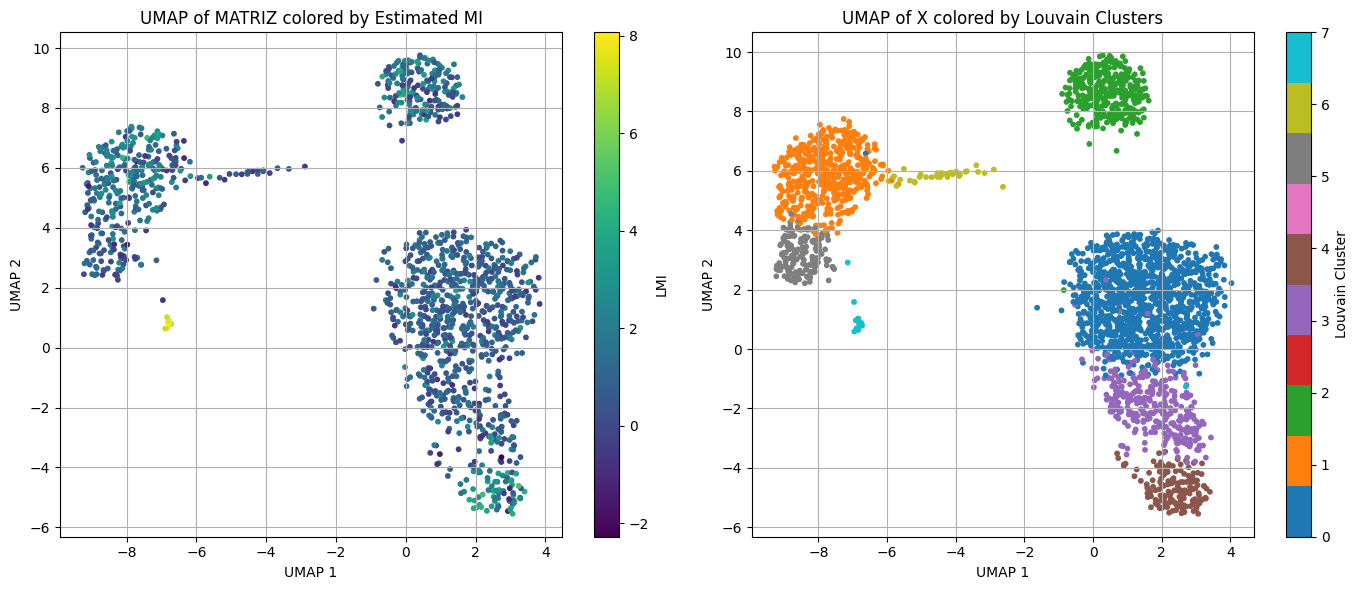

  0%|          | 0/1000 [00:00<?, ?Epoch/s]

Training stopped at epoch  138
Validation loss: 3.4791530768076577


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


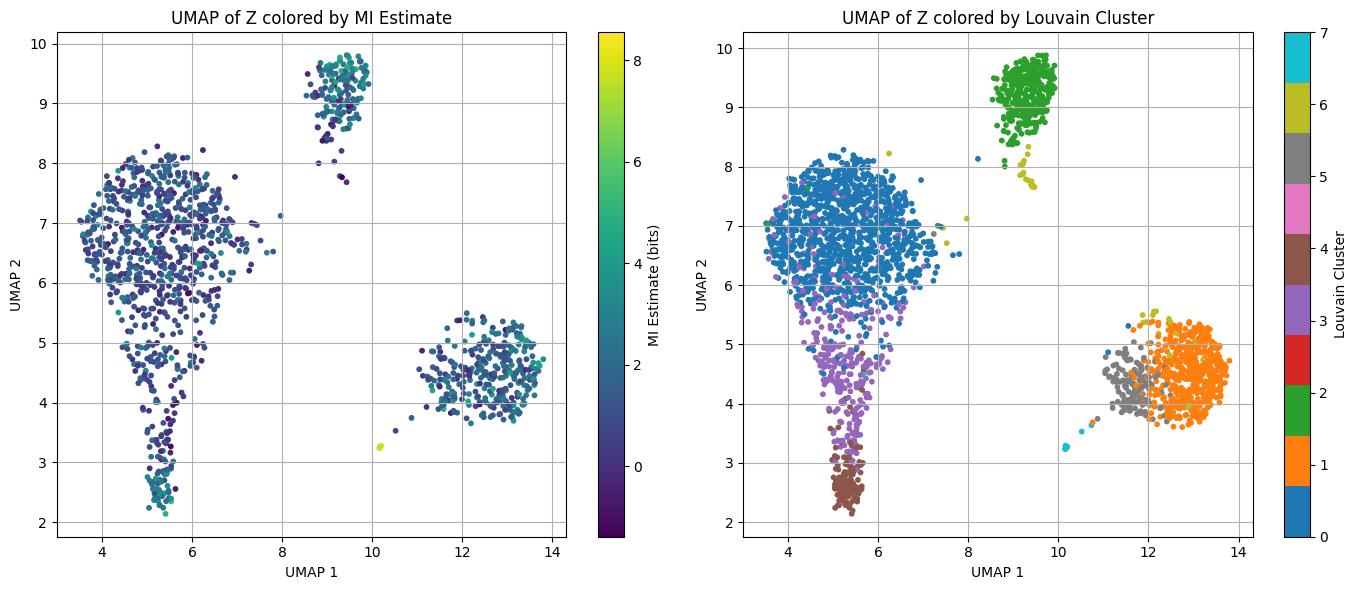

In [13]:
import scanpy as sc
import lmi_core as lmi
import models
import ksg

import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

# CARGAR Y NORMALIZAR DATOS
adata = sc.datasets.pbmc3k_processed()
X = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X
y = adata.obs["louvain"].astype("category").cat.codes.values
#X = StandardScaler().fit_transform(X)




# VISUALIZACIÓN ORIGINAL
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=estimate, cmap='viridis', s=10)
axs[0].set_title("UMAP of MATRIZ colored by Estimated MI")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

sc2 = axs[1].scatter(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of X colored by Louvain Clusters")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Louvain Cluster")

plt.tight_layout()
plt.show()

# SEPARAR EN DOS VISTAS
X1 = X
X2 = X

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    regularizer='models.AECross',
                                    alpha=1, lam=1,
                                    N_dims=100, epochs=1000, quiet=False)



# CONCATENAR Zx y Zy
Z_concat = np.concatenate([Zx, Zy], axis=1)

# UMAP EN Z
Zx_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN EMBEBIDA
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='rainbow', s=10)
axs[0].set_title("UMAP of Z colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of Z colored by Louvain Cluster")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Louvain Cluster")

plt.tight_layout()
plt.show()


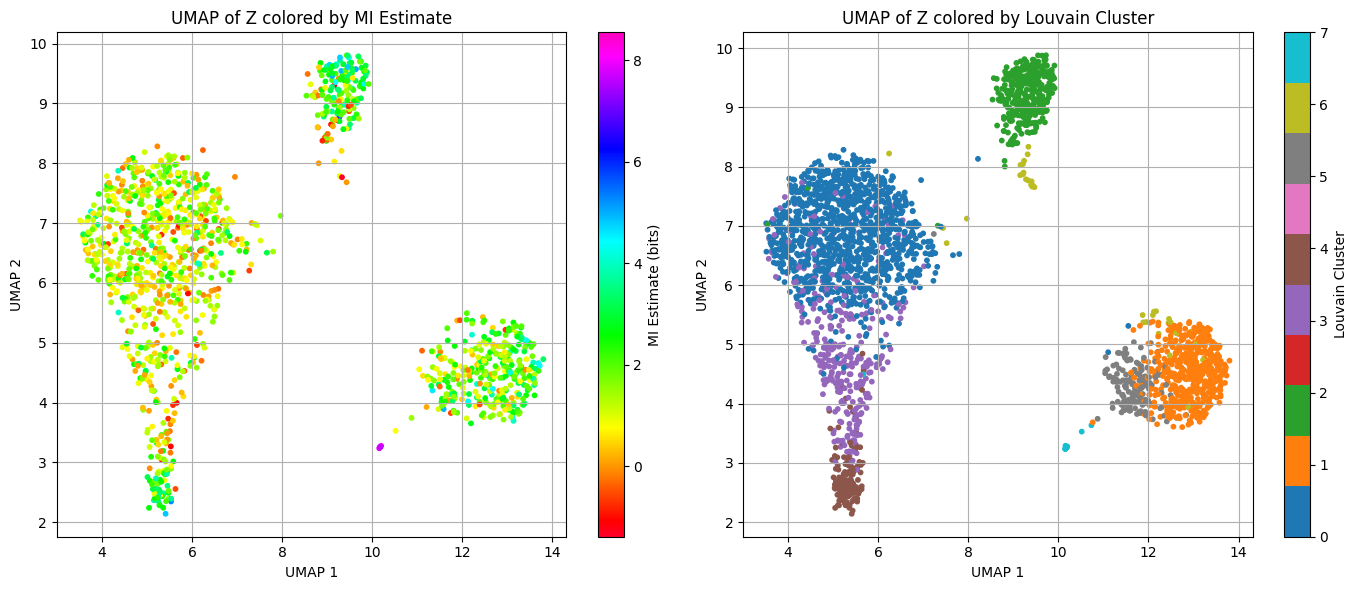

In [16]:
# VISUALIZACIÓN EMBEBIDA
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='gist_rainbow', s=10)
axs[0].set_title("UMAP of Z colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of Z colored by Louvain Cluster")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Louvain Cluster")

plt.tight_layout()
plt.show()


  0%|          | 0/2000 [00:00<?, ?Epoch/s]

Training stopped at epoch  129
Validation loss: 3.51315975189209


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.


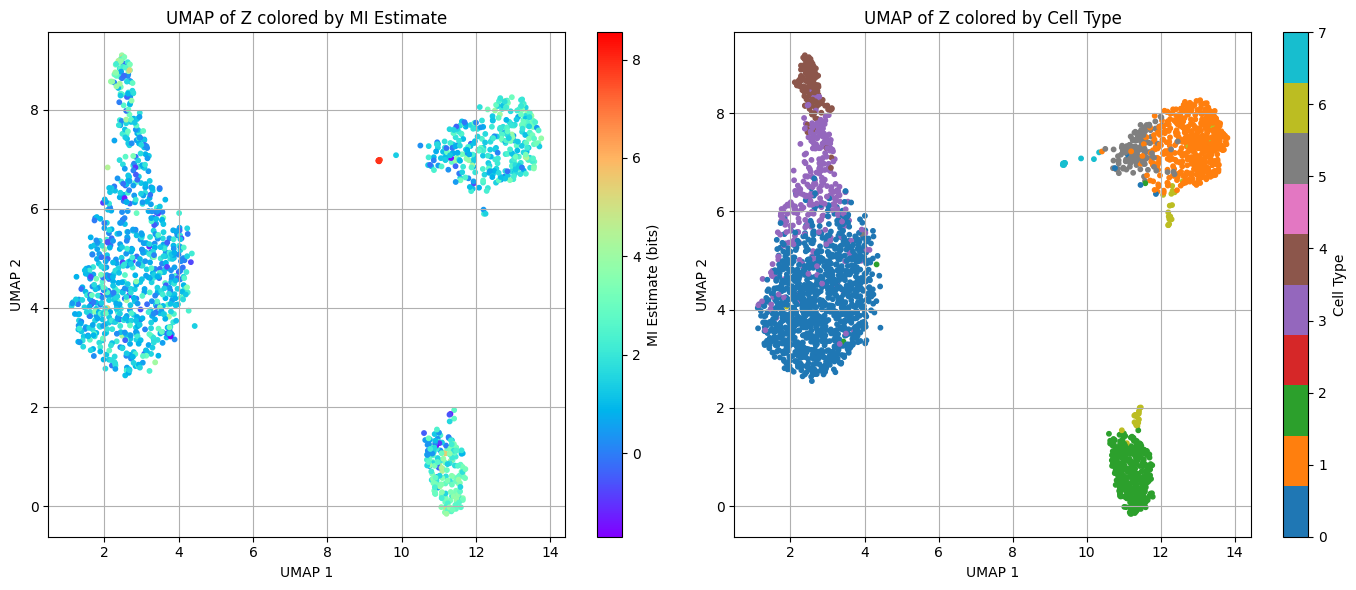

In [18]:
# SEPARAR EN DOS VISTAS
X1 = X
X2 = X

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    regularizer='models.AECross',
                                    alpha=1, lam=1,
                                    N_dims=50, epochs=2000, quiet=False)

# CONCATENAR Zx y Zy
Z_concat = np.concatenate([Zx, Zy], axis=1)

# UMAP EN Z
Zx_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN EMBEBIDA
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sc1 = axs[0].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=estimate, cmap='rainbow', s=10)
axs[0].set_title("UMAP of Z colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="MI Estimate (bits)")

sc2 = axs[1].scatter(Zx_umap[:, 0], Zx_umap[:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of Z colored by Cell Type")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Cell Type")

plt.tight_layout()
plt.show()

In [30]:
# IMPORTAR MÓDULOS
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import umap

from sklearn.preprocessing import StandardScaler

import lmi_core as lmi
import models
import ksg

# CARGAR DATOS PROCESADOS
adata = sc.datasets.pbmc3k_processed()
X_full = adata.X.toarray() if not isinstance(adata.X, np.ndarray) else adata.X
y_full = adata.obs["louvain"].astype("category").cat.codes.values
print(y_full)
# FILTRAR SOLO CLÚSTER 0
mask_cluster_0 = adata.obs["louvain"] == "0"
adata_0 = adata[mask_cluster_0].copy()
X = adata_0 if not isinstance(adata_0.X, np.ndarray) else adata_0.X
y = adata_0.obs["louvain"].astype("category").cat.codes.values

# NORMALIZAR
X = StandardScaler().fit_transform(X)

# SEPARAR EN DOS VISTAS IGUALES (puedes hacer split real si deseas)
X1 = X
X2 = X

# CALCULAR LMI
estimate, (Zx, Zy), model = lmi.lmi(X1, X2,
                                    regularizer='models.AECross',
                                    alpha=1, lam=1,
                                    N_dims=50, epochs=2000, quiet=False)

# CONCATENAR Zx y Zy
Z_concat = np.concatenate([Zx, Zy], axis=1)

# UMAP SOBRE EL ESPACIO LATENTE
reducer = umap.UMAP(n_components=2, random_state=42)
Z_umap = reducer.fit_transform(Z_concat)

# VISUALIZACIÓN
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# PLOT LMI ESTIMATE
sc1 = axs[0].scatter(Z_umap[:, 0], Z_umap[:, 1], c=estimate, cmap='viridis', s=10)
axs[0].set_title("UMAP of Latent Space colored by MI Estimate")
axs[0].set_xlabel("UMAP 1")
axs[0].set_ylabel("UMAP 2")
axs[0].grid(True)
plt.colorbar(sc1, ax=axs[0], label="LMI")

# PLOT CLASES (en este caso, todo es cluster 0, será un solo color)
sc2 = axs[1].scatter(Z_umap[:, 0], Z_umap[:, 1], c=y, cmap='tab10', s=10)
axs[1].set_title("UMAP of Latent Space colored by Cluster Labels")
axs[1].set_xlabel("UMAP 1")
axs[1].set_ylabel("UMAP 2")
axs[1].grid(True)
plt.colorbar(sc2, ax=axs[1], label="Cluster")

plt.tight_layout()
plt.show()


[0 2 0 ... 2 2 0]


ValueError: Found array with 0 sample(s) (shape=(0, 1838)) while a minimum of 1 is required by StandardScaler.

In [27]:
X

array([], shape=(0, 1838), dtype=float32)